## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings;
warnings.simplefilter('ignore')

## **Loading Dataset**

In [2]:
df = pd.read_csv("survey_results_public.csv")

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


## **Data Validation - Total Cells vs Missing %**

In [4]:
#Finding % of missing data
missing_count = df.isnull().sum() #number of missing
total_cells = np.product(df.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total cell: ', total_cells)
print('Total missing values: ', total_missing)
print('Missing: ', missing_percent, '%')

Total cell:  3932121
Total missing values:  908664
Missing:  23.108749705311713 %


In [5]:
df.shape

(64461, 61)

## **Data Preprocessing Starts**

In [6]:
df = df[["Country", "EdLevel", "Employment", "YearsCodePro", "ConvertedComp"]]
df = df.rename({"ConvertedComp": "Salary"}, axis=1)
df.head()

,Country,EdLevel,Employment,YearsCodePro,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",27,NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,4,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,4,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,8,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       64072 non-null  object 
 1   EdLevel       57431 non-null  object 
 2   Employment    63854 non-null  object 
 3   YearsCodePro  46349 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.5+ MB


In [8]:
df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26542
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13112
Some college/university study without earning a degree                                 7239
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4771
Associate degree (A.A., A.S., etc.)                                                    1843
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1690
Primary/elementary school                                                               941
Professional degree (JD, MD, etc.)                                                      800
I never completed any formal education                                                  493
Name: EdLevel, dtype: int64

In [9]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,Employment,YearsCodePro,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,13,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,4,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,2,40070.0
11,Spain,Some college/university study without earning ...,Employed full-time,7,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",Employed full-time,20,38916.0


In [10]:
df.shape

(34756, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   Employment    34717 non-null  object 
 3   YearsCodePro  34621 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [12]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
Employment      0
YearsCodePro    0
Salary          0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34025 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34025 non-null  object 
 1   EdLevel       34025 non-null  object 
 2   Employment    34025 non-null  object 
 3   YearsCodePro  34025 non-null  object 
 4   Salary        34025 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [14]:
df['Country'].value_counts()

United States        8082
India                2563
United Kingdom       2551
Germany              2206
Canada               1293
                     ... 
Brunei Darussalam       1
Guinea                  1
Burkina Faso            1
Malawi                  1
Yemen                   1
Name: Country, Length: 159, dtype: int64

In [15]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [16]:
country_map = shorten_categories(df.Country.value_counts(), 200)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

United States         8082
Other                 4369
India                 2563
United Kingdom        2551
Germany               2206
Canada                1293
Brazil                1139
France                1103
Netherlands            798
Poland                 789
Australia              755
Spain                  744
Italy                  660
Russian Federation     595
Sweden                 573
Turkey                 378
Switzerland            342
Israel                 323
Pakistan               318
Romania                313
Mexico                 312
Czech Republic         307
Ukraine                296
Austria                296
South Africa           281
Ireland                280
Iran                   270
Norway                 270
Belgium                255
Denmark                242
Portugal               237
Argentina              233
Hungary                227
Finland                224
New Zealand            201
Greece                 200
Name: Country, dtype: int64

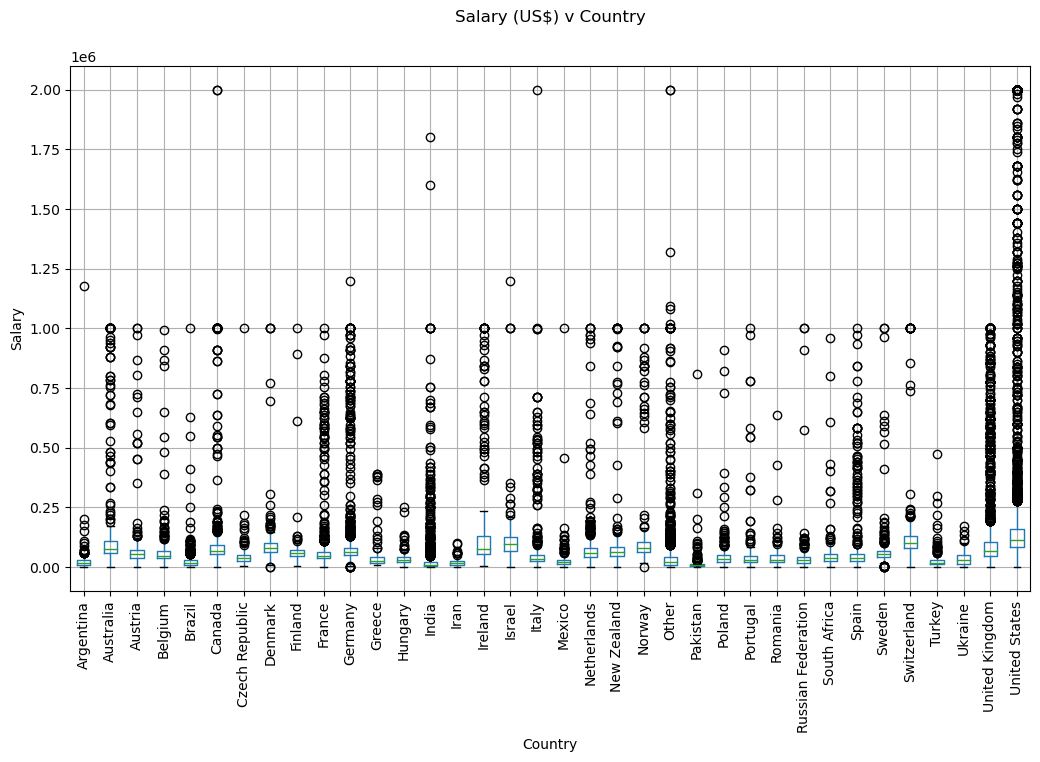

In [17]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34025 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34025 non-null  object 
 1   EdLevel       34025 non-null  object 
 2   Employment    34025 non-null  object 
 3   YearsCodePro  34025 non-null  object 
 4   Salary        34025 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [19]:
df = df[df["Salary"] <= 150000]
df = df[df["Salary"] >= 5000]
df = df[df['Country'] != 'Other']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25024 entries, 7 to 64141
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       25024 non-null  object 
 1   EdLevel       25024 non-null  object 
 2   Employment    25024 non-null  object 
 3   YearsCodePro  25024 non-null  object 
 4   Salary        25024 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


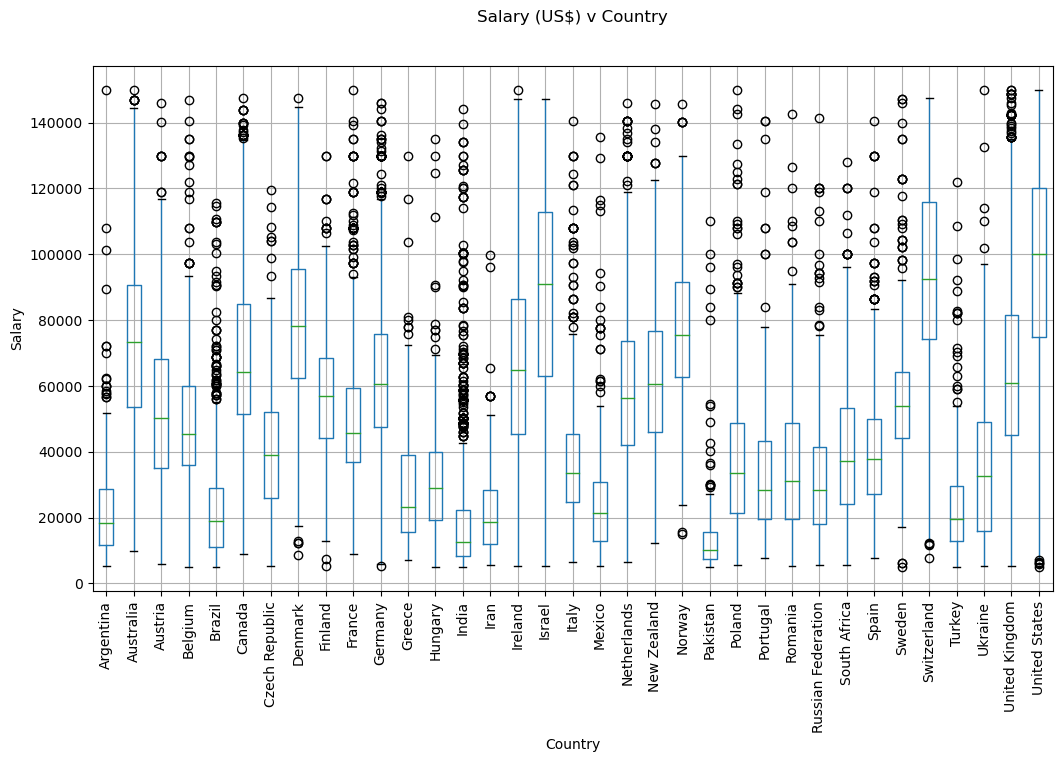

In [20]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [21]:
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '23', '3', '10', '14', '12', '29',
       '6', '28', '8', '15', '11', '25', '5', '9', 'Less than 1 year',
       '21', '16', '35', '24', '18', '32', '22', '38', '19', '30', '26',
       '27', '17', '40', '34', '33', '36', '39', '37', '31', '45', '41',
       '50', '42', 'More than 50 years', '43', '44', '48', '46', '47'],
      dtype=object)

In [22]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [23]:
df["YearsCodePro"].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. , 23. ,  3. , 10. , 14. , 12. ,
       29. ,  6. , 28. ,  8. , 15. , 11. , 25. ,  5. ,  9. ,  0.5, 21. ,
       16. , 35. , 24. , 18. , 32. , 22. , 38. , 19. , 30. , 26. , 27. ,
       17. , 40. , 34. , 33. , 36. , 39. , 37. , 31. , 45. , 41. , 50. ,
       42. , 43. , 44. , 48. , 46. , 47. ])

In [24]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

In [25]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [26]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [27]:
df["Employment"].unique()

array(['Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed part-time'], dtype=object)

In [28]:
def clean_employment(x):
    if 'Employed full-time' in x:
        return 'Full time'
    if 'Employed part-time' in x:
        return 'Part time'
    if 'Independent contractor, freelancer, or self-employed' in x:
        return 'No employment'
    return 'No employment'

df['Employment'] = df['Employment'].apply(clean_employment)

In [29]:
df["Employment"].unique()

array(['Full time', 'No employment', 'Part time'], dtype=object)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25024 entries, 7 to 64141
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       25024 non-null  object 
 1   EdLevel       25024 non-null  object 
 2   Employment    25024 non-null  object 
 3   YearsCodePro  25024 non-null  float64
 4   Salary        25024 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.1+ MB


## **Data Analysis Part**

In [31]:
plt.style.use('seaborn-darkgrid')
plt.rcParams["figure.figsize"] = (20,10)

Text(0.5, 1.0, 'Education label vs Salary')

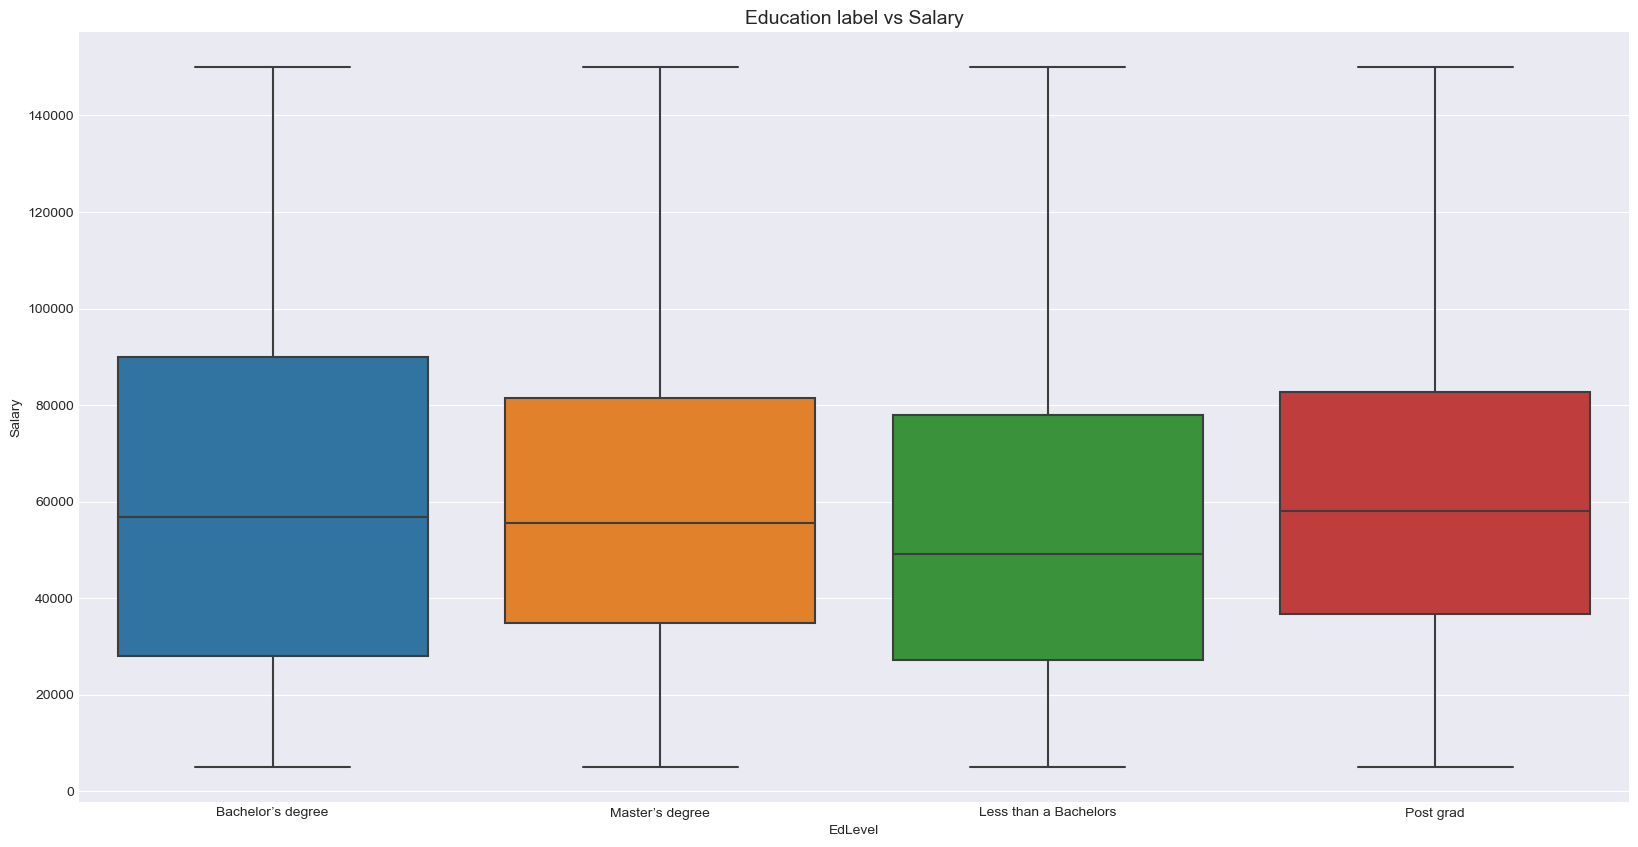

In [32]:
sns.boxplot(x ='EdLevel', y='Salary', data=df)
plt.title('Education label vs Salary', fontsize = 14)

In [33]:
plt.style.use('seaborn-darkgrid')
plt.rcParams["figure.figsize"] = (20,10)

Text(0.5, 1.0, 'Employment vs Salary')

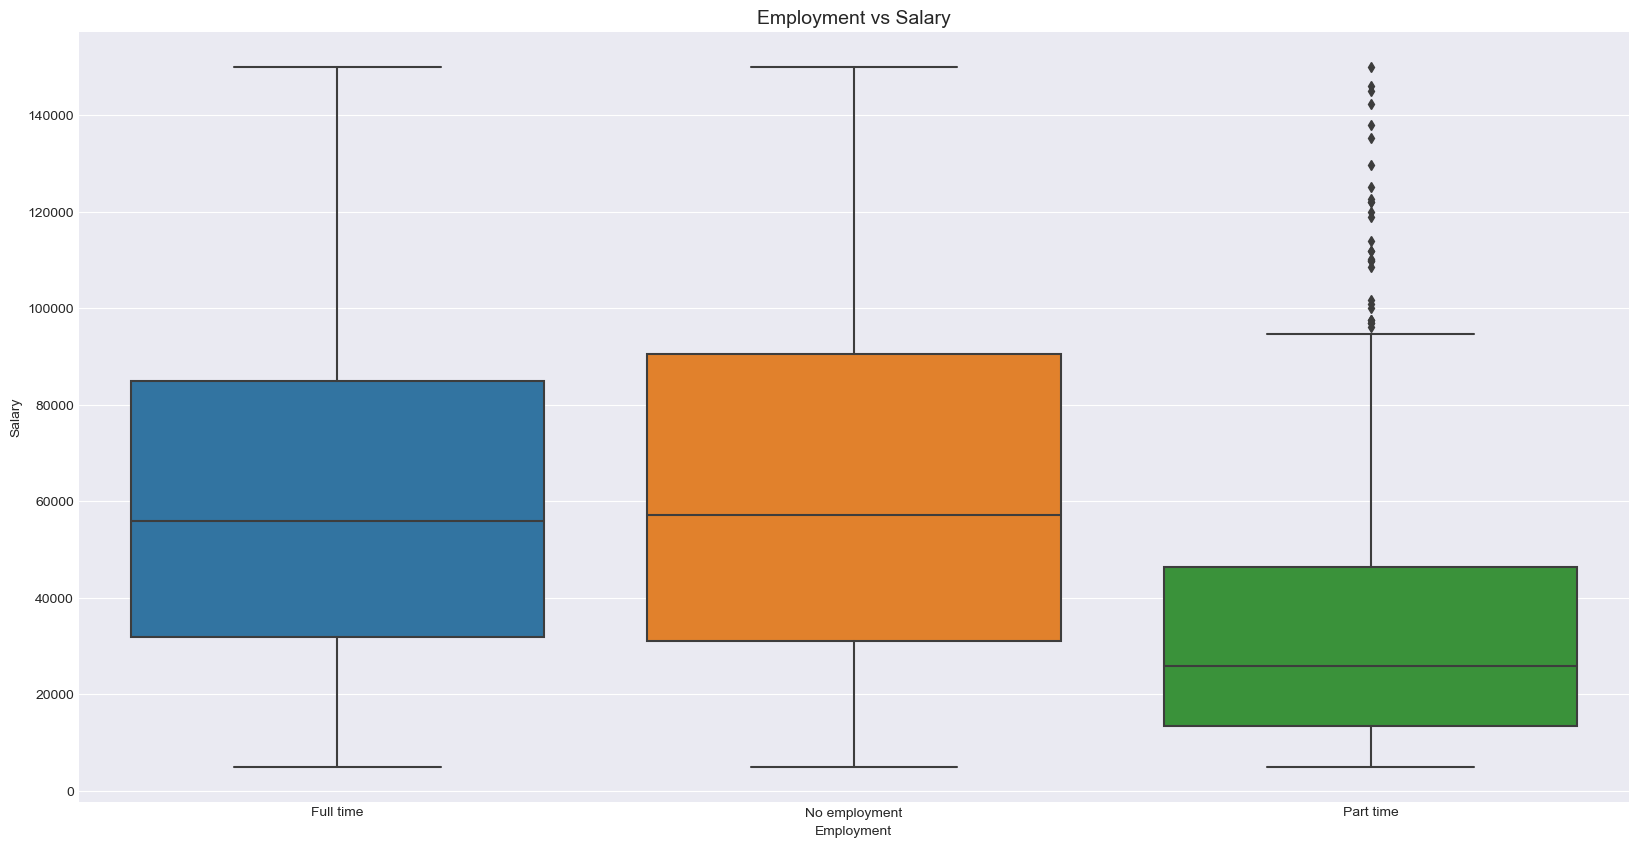

In [34]:
sns.boxplot(x ='Employment', y='Salary', data=df)
plt.title('Employment vs Salary', fontsize = 14)

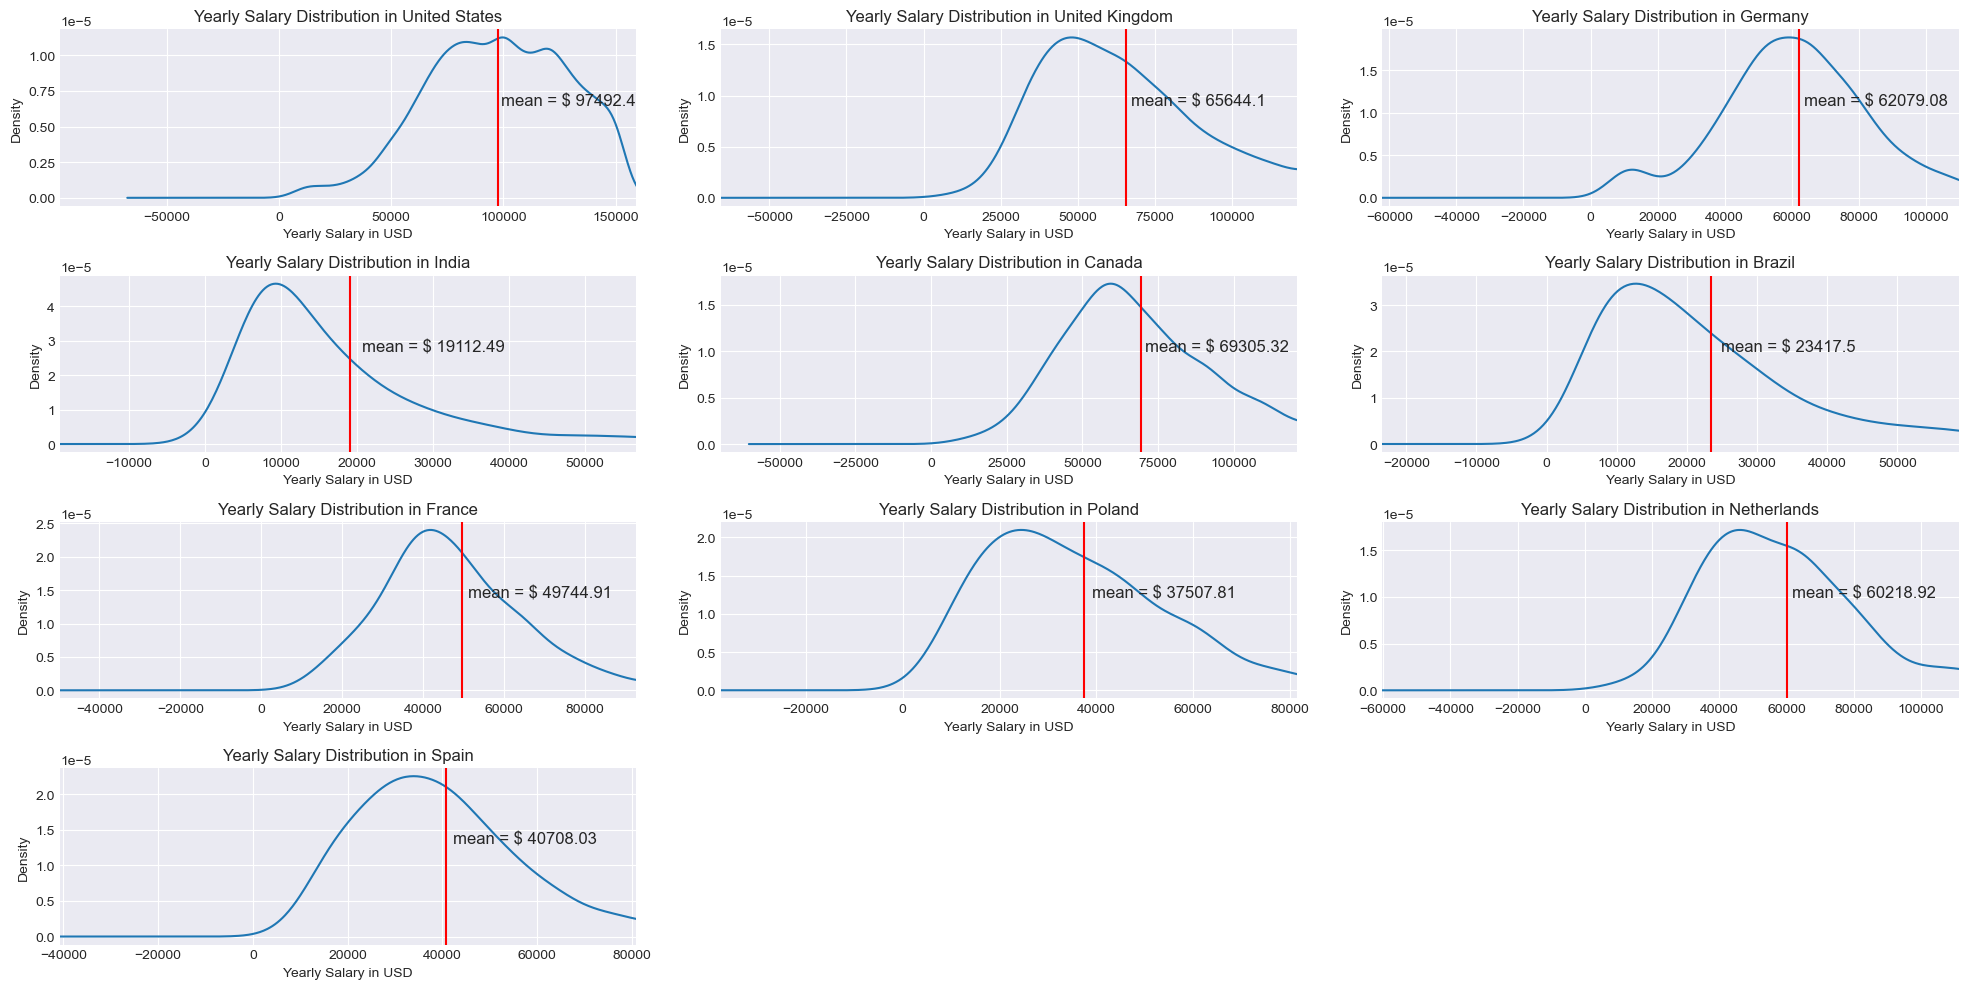

In [35]:
fig = plt.figure(figsize = (20, 10))

countries = df['Country'].value_counts().sort_values(ascending = False)[:10].index.tolist()

for i, country in enumerate(countries):
    plt.subplot(4, 3, i + 1)
    temp_salaries = df.loc[df['Country'] == country, 'Salary']

    ax = temp_salaries.plot(kind = 'kde')
    ax.axvline(temp_salaries.mean(), linestyle = '-', color = 'red')
    ax.text((temp_salaries.mean() + 1500), (float(ax.get_ylim()[1]) * 0.55), 'mean = $ ' + str(round(temp_salaries.mean(),2)), fontsize = 12)
    ax.set_xlabel('Yearly Salary in USD')
    ax.set_xlim(-temp_salaries.mean(), temp_salaries.mean() + 2 * temp_salaries.std())
    ax.set_title('Yearly Salary Distribution in {}'.format(country))

plt.tight_layout()
plt.show()

## **label Encoding**

In [36]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()
#le.classes_

array([0, 2, 1, 3])

In [37]:
le_employment = LabelEncoder()
df['Employment'] = le_employment.fit_transform(df['Employment'])
df["Employment"].unique()

array([0, 1, 2])

In [38]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([34, 33, 28, 19, 10,  5,  3, 17,  4,  9, 11, 16,  6, 29, 32, 30, 12,
       25, 24, 13, 18,  8,  2, 31, 23,  1,  0, 14, 21, 22,  7, 15, 26, 27,
       20])

In [39]:
df.shape

(25024, 5)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25024 entries, 7 to 64141
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       25024 non-null  int32  
 1   EdLevel       25024 non-null  int32  
 2   Employment    25024 non-null  int32  
 3   YearsCodePro  25024 non-null  float64
 4   Salary        25024 non-null  float64
dtypes: float64(2), int32(3)
memory usage: 879.8 KB


In [41]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [42]:
X.head()

,Country,EdLevel,Employment,YearsCodePro
7,34,0,0,13.0
9,33,2,0,4.0
10,33,0,0,2.0
11,28,1,0,7.0
12,19,1,0,20.0


In [43]:
y.head()

7     116000.0
9      32315.0
10     40070.0
11     14268.0
12     38916.0
Name: Salary, dtype: float64

## **Data Splitting in Train and Test Set**

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 120)

In [45]:
print(len(X_train), len(X_test))

17516 7508


In [46]:
print(len(y_train), len(y_test))

17516 7508


## **Feature Selection**

In [47]:
corr = X_train.corr()
corr

,Country,EdLevel,Employment,YearsCodePro
Country,1.000000,-0.093601,-0.072937,0.021696
EdLevel,-0.093601,1.000000,0.021946,0.108663
Employment,-0.072937,0.021946,1.000000,0.041816
YearsCodePro,0.021696,0.108663,0.041816,1.000000


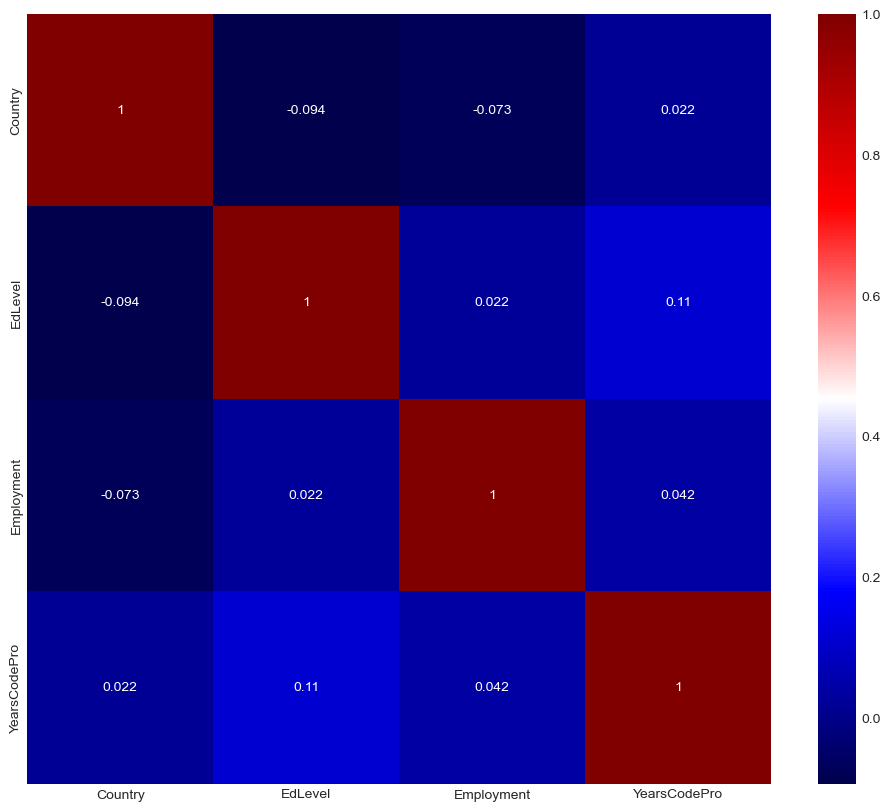

In [48]:
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic");

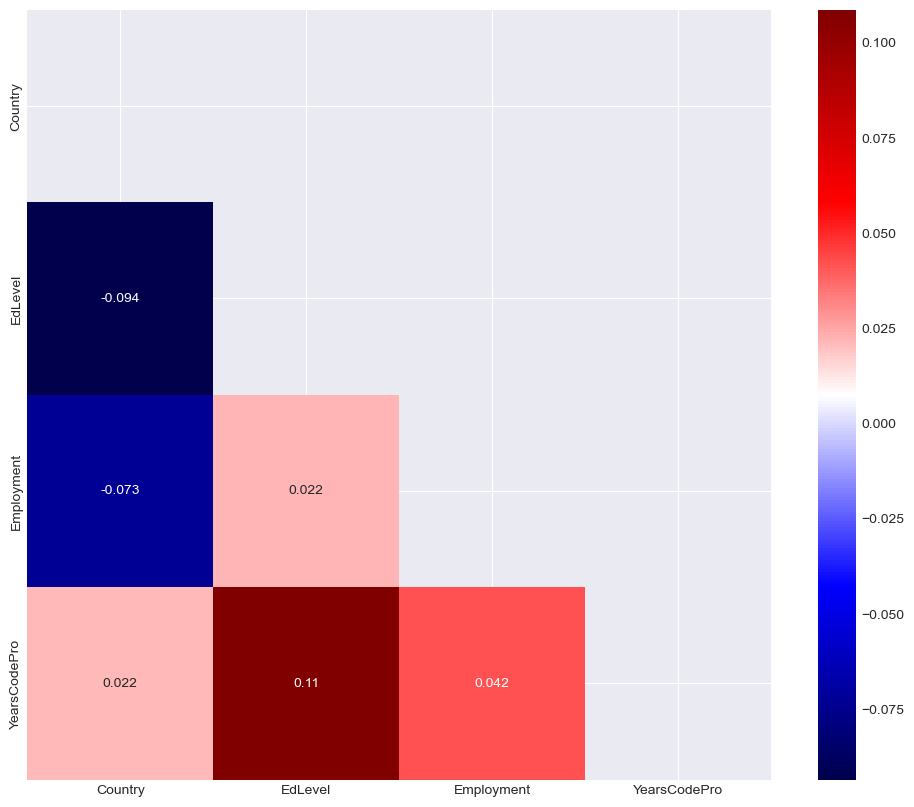

In [49]:
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

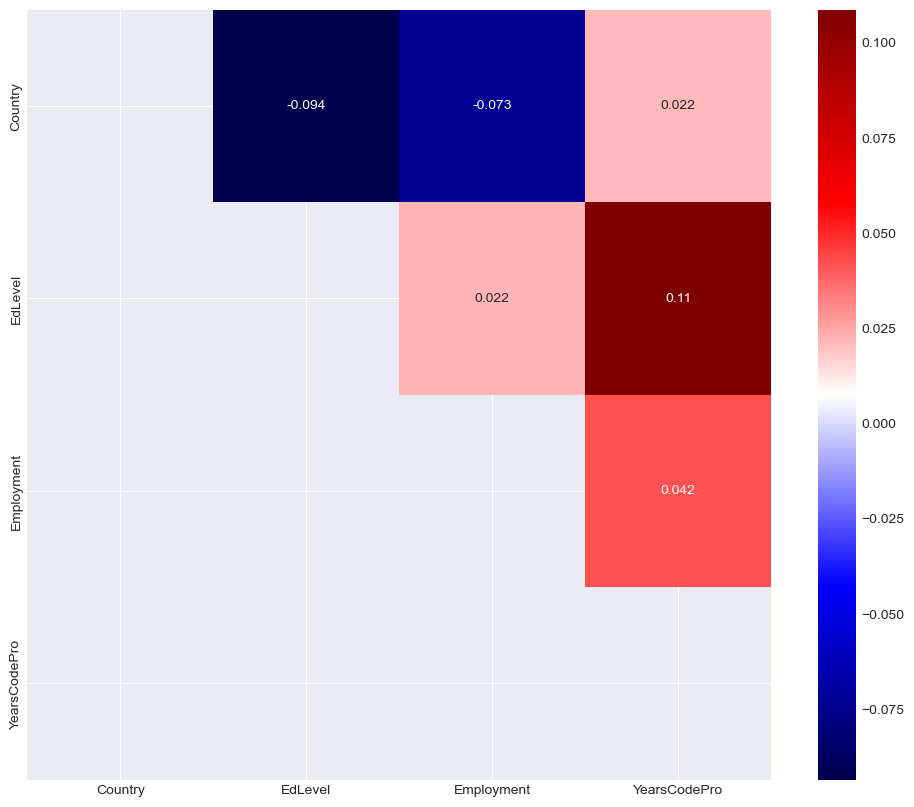

In [50]:
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask2);

## **DecisionTreeRegressor**

In [51]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg = DecisionTreeRegressor(random_state=0)
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [52]:
decision_tree_reg.score(X_train, y_train)

0.7556142476744772

In [53]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_train_pred = decision_tree_reg.predict(X_train)
y_test_pred = decision_tree_reg.predict(X_test)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

mse_train = mean_squared_error(y_train, y_train_pred, squared=True)
mse_test = mean_squared_error(y_test, y_test_pred, squared=True)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared for the training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("RMSE(Root Mean Squared Error) for training set:", rmse_train)
print("RMSE(Root Mean Squared Error) for testing set:", rmse_test)
print()
print("MSE(Mean Squared Error) for training set:", mse_train)
print("MSE(Mean Squared Error) for testing set:", mse_test)
print()
print("MAE(Mean Absolute Error) for training set:", mae_train)
print("MAE(Mean Absolute Error) for testing set:", mae_test)
print()
print(f"R-squared for training set: {round(r2_train, 4)*100}%")
print(f"R-squared for testing set: {round(r2_test, 4)*100}%")

RMSE(Root Mean Squared Error) for training set: 18235.224770180146
RMSE(Root Mean Squared Error) for testing set: 24085.579509058407

MSE(Mean Squared Error) for training set: 332523422.41899157
MSE(Mean Squared Error) for testing set: 580115140.2871742

MAE(Mean Absolute Error) for training set: 12553.355242590329
MAE(Mean Absolute Error) for testing set: 17202.667077989176

R-squared for training set: 75.56%
R-squared for testing set: 57.58%


In [54]:
import math
if mse_test <= 0:
    print('The Root Mean Squared Error on the Training dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Root Mean Squared Error on the Training dataset is: ', math.log(rmse_train))
print()
if mse_test <= 0:
    print('The Root Mean Squared Error on the Testing dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Root Mean Squared Error on the Testing dataset is: ', math.log(rmse_test))
print()
if mse_test <= 0:
    print('The Mean Absolute Error on the Training dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Mean Absolute Error on the Training dataset is: ', math.log(mae_train))
print()
if mse_test <= 0:
    print('The Mean Absolute Error on the Testing dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Mean Absolute Error on the Testing dataset is: ', math.log(mae_test))

The Mean Log of Root Mean Squared Error on the Training dataset is:  9.811110429472278

The Mean Log of Root Mean Squared Error on the Testing dataset is:  10.089368579769603

The Mean Log of Mean Absolute Error on the Training dataset is:  9.437743258835482

The Mean Log of Mean Absolute Error on the Testing dataset is:  9.75281971345436


In [55]:
# country, edlevel, employment, yearscode
import numpy as np
sample = np.array([["United States", 'Master’s degree', 'Full time', 15 ]])
sample

array([['United States', 'Master’s degree', 'Full time', '15']],
      dtype='<U15')

In [56]:
sample[:, 0] = le_country.transform(sample[:, 0])
sample[:, 1] = le_education.transform(sample[:, 1])
sample[:, 2] = le_employment.transform(sample[:, 2])
sample = sample.astype(float)
print(sample)

[[34.  2.  0. 15.]]


In [57]:
y_sample = decision_tree_reg.predict(sample)

In [58]:
y_sample

array([126375.])

## **RandomForestRegressor**

In [59]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [60]:
random_forest_reg.score(X_train, y_train)

0.7465402537894261

In [61]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_train_pred = random_forest_reg.predict(X_train)
y_test_pred = random_forest_reg.predict(X_test)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

mse_train = mean_squared_error(y_train, y_train_pred, squared=True)
mse_test = mean_squared_error(y_test, y_test_pred, squared=True)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared for the training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("RMSE(Root Mean Squared Error) for training set:", rmse_train)
print("RMSE(Root Mean Squared Error) for testing set:", rmse_test)
print()
print("MSE(Mean Squared Error) for training set:", mse_train)
print("MSE(Mean Squared Error) for testing set:", mse_test)
print()
print("MAE(Mean Absolute Error) for training set:", mae_train)
print("MAE(Mean Absolute Error) for testing set:", mae_test)
print()
print(f"R-squared for training set: {round(r2_train, 4)*100}%")
print(f"R-squared for testing set: {round(r2_test, 4)*100}%")

RMSE(Root Mean Squared Error) for training set: 18570.674470442445
RMSE(Root Mean Squared Error) for testing set: 22580.643877629635

MSE(Mean Squared Error) for training set: 344869950.28714275
MSE(Mean Squared Error) for testing set: 509885477.9283327

MAE(Mean Absolute Error) for training set: 13354.23733224126
MAE(Mean Absolute Error) for testing set: 16418.956202040903

R-squared for training set: 74.65%
R-squared for testing set: 62.71%


In [62]:
import math
if mse_test <= 0:
    print('The Root Mean Squared Error on the Training dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Root Mean Squared Error on the Training dataset is: ', math.log(rmse_train))
print()
if mse_test <= 0:
    print('The Root Mean Squared Error on the Testing dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Root Mean Squared Error on the Testing dataset is: ', math.log(rmse_test))
print()
if mse_test <= 0:
    print('The Mean Absolute Error on the Training dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Mean Absolute Error on the Training dataset is: ', math.log(mae_train))
print()
if mse_test <= 0:
    print('The Mean Absolute Error on the Testing dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Mean Absolute Error on the Testing dataset is: ', math.log(mae_test))

The Mean Log of Root Mean Squared Error on the Training dataset is:  9.829338974120269

The Mean Log of Root Mean Squared Error on the Testing dataset is:  10.024848352692564

The Mean Log of Mean Absolute Error on the Training dataset is:  9.499589016630807

The Mean Log of Mean Absolute Error on the Testing dataset is:  9.706191812291625


In [63]:
# country, edlevel, employment, yearscode
import numpy as np
sample = np.array([["United States", 'Master’s degree', 'Full time', 15 ]])
sample

array([['United States', 'Master’s degree', 'Full time', '15']],
      dtype='<U15')

In [64]:
sample[:, 0] = le_country.transform(sample[:, 0])
sample[:, 1] = le_education.transform(sample[:, 1])
sample[:, 2] = le_employment.transform(sample[:, 2])
sample = sample.astype(float)
print(sample)

[[34.  2.  0. 15.]]


In [65]:
y_sample = random_forest_reg.predict(sample)

In [66]:
y_sample

array([126617.50170426])

## **GridSearchCV (DecisionTreeRegressor)**

In [67]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gridSearchCV = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gridSearchCV.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [68]:
regressor = gridSearchCV.best_estimator_
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12, random_state=0)

In [69]:
regressor.score(X_train, y_train)

0.7010943717782773

In [70]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

mse_train = mean_squared_error(y_train, y_train_pred, squared=True)
mse_test = mean_squared_error(y_test, y_test_pred, squared=True)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared for the training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("RMSE(Root Mean Squared Error) for training set:", rmse_train)
print("RMSE(Root Mean Squared Error) for testing set:", rmse_test)
print()
print("MSE(Mean Squared Error) for training set:", mse_train)
print("MSE(Mean Squared Error) for testing set:", mse_test)
print()
print("MAE(Mean Absolute Error) for training set:", mae_train)
print("MAE(Mean Absolute Error) for testing set:", mae_test)
print()
print(f"R-squared for training set: {round(r2_train, 4)*100}%")
print(f"R-squared for testing set: {round(r2_test, 4)*100}%")

RMSE(Root Mean Squared Error) for training set: 20166.950192627122
RMSE(Root Mean Squared Error) for testing set: 22653.266059251808

MSE(Mean Squared Error) for training set: 406705880.07190317
MSE(Mean Squared Error) for testing set: 513170463.1512499

MAE(Mean Absolute Error) for training set: 14621.293051790206
MAE(Mean Absolute Error) for testing set: 16375.629949784274

R-squared for training set: 70.11%
R-squared for testing set: 62.470000000000006%


In [71]:
import math
if mse_test <= 0:
    print('The Root Mean Squared Error on the Training dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Root Mean Squared Error on the Training dataset is: ', math.log(rmse_train))
print()
if mse_test <= 0:
    print('The Root Mean Squared Error on the Testing dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Root Mean Squared Error on the Testing dataset is: ', math.log(rmse_test))
print()
if mse_test <= 0:
    print('The Mean Absolute Error on the Training dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Mean Absolute Error on the Training dataset is: ', math.log(mae_train))
print()
if mse_test <= 0:
    print('The Mean Absolute Error on the Testing dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Mean Absolute Error on the Testing dataset is: ', math.log(mae_test))

The Mean Log of Root Mean Squared Error on the Training dataset is:  9.911800414390529

The Mean Log of Root Mean Squared Error on the Testing dataset is:  10.02805931739227

The Mean Log of Mean Absolute Error on the Training dataset is:  9.590234173427724

The Mean Log of Mean Absolute Error on the Testing dataset is:  9.703549529979327


In [72]:
# country, edlevel, employment, yearscode
import numpy as np
sample = np.array([["United States", 'Master’s degree', 'Full time', 15 ]])
sample

array([['United States', 'Master’s degree', 'Full time', '15']],
      dtype='<U15')

In [73]:
sample[:, 0] = le_country.transform(sample[:, 0])
sample[:, 1] = le_education.transform(sample[:, 1])
sample[:, 2] = le_employment.transform(sample[:, 2])
sample = sample.astype(float)
print(sample)

[[34.  2.  0. 15.]]


In [74]:
y_pred_sample = regressor.predict(sample)
y_pred_sample

array([122604.16666667])

## **LinearRegression**

In [75]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [76]:
linear_reg.score(X_train, y_train) #R-squared for training set

0.25865231679584455

In [77]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

mse_train = mean_squared_error(y_train, y_train_pred, squared=True)
mse_test = mean_squared_error(y_test, y_test_pred, squared=True)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared for the training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("RMSE(Root Mean Squared Error) for training set:", rmse_train)
print("RMSE(Root Mean Squared Error) for testing set:", rmse_test)
print()
print("MSE(Mean Squared Error) for training set:", mse_train)
print("MSE(Mean Squared Error) for testing set:", mse_test)
print()
print("MAE(Mean Absolute Error) for training set:", mae_train)
print("MAE(Mean Absolute Error) for testing set:", mae_test)
print()
print(f"R-squared for training set: {round(r2_train, 4)*100}%")
print(f"R-squared for testing set: {round(r2_test, 4)*100}%")

RMSE(Root Mean Squared Error) for training set: 31760.267142738758
RMSE(Root Mean Squared Error) for testing set: 31812.885773661674

MSE(Mean Squared Error) for training set: 1008714568.9781312
MSE(Mean Squared Error) for testing set: 1012059701.2480452

MAE(Mean Absolute Error) for training set: 26053.99628478859
MAE(Mean Absolute Error) for testing set: 26317.990967773978

R-squared for training set: 25.869999999999997%
R-squared for testing set: 25.990000000000002%


In [78]:
import math
if mse_test <= 0:
    print('The Root Mean Squared Error on the Training dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Root Mean Squared Error on the Training dataset is: ', math.log(rmse_train))
print()
if mse_test <= 0:
    print('The Root Mean Squared Error on the Testing dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Root Mean Squared Error on the Testing dataset is: ', math.log(rmse_test))
print()
if mse_test <= 0:
    print('The Mean Absolute Error on the Training dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Mean Absolute Error on the Training dataset is: ', math.log(mae_train))
print()
if mse_test <= 0:
    print('The Mean Absolute Error on the Testing dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Mean Absolute Error on the Testing dataset is: ', math.log(mae_test))

The Mean Log of Root Mean Squared Error on the Training dataset is:  10.365971326620999

The Mean Log of Root Mean Squared Error on the Testing dataset is:  10.367626699699878

The Mean Log of Mean Absolute Error on the Training dataset is:  10.167926443660916

The Mean Log of Mean Absolute Error on the Testing dataset is:  10.178008051514267


In [79]:
# country, edlevel, employment, yearscode
import numpy as np
sample = np.array([["United States", 'Master’s degree', 'Full time', 15 ]])
sample

array([['United States', 'Master’s degree', 'Full time', '15']],
      dtype='<U15')

In [80]:
sample[:, 0] = le_country.transform(sample[:, 0])
sample[:, 1] = le_education.transform(sample[:, 1])
sample[:, 2] = le_employment.transform(sample[:, 2])
sample = sample.astype(float)
print(sample)

[[34.  2.  0. 15.]]


In [81]:
y_sample = linear_reg.predict(sample)

In [82]:
y_sample

array([87455.96724176])

## **XGBRegressor**

In [83]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [84]:
xgb_reg.score(X_train, y_train)

0.7160505352020886

In [85]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_train_pred = xgb_reg.predict(X_train)
y_test_pred = xgb_reg.predict(X_test)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

mse_train = mean_squared_error(y_train, y_train_pred, squared=True)
mse_test = mean_squared_error(y_test, y_test_pred, squared=True)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared for the training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("RMSE(Root Mean Squared Error) for training set:", rmse_train)
print("RMSE(Root Mean Squared Error) for testing set:", rmse_test)
print()
print("MSE(Mean Squared Error) for training set:", mse_train)
print("MSE(Mean Squared Error) for testing set:", mse_test)
print()
print("MAE(Mean Absolute Error) for training set:", mae_train)
print("MAE(Mean Absolute Error) for testing set:", mae_test)
print()
print(f"R-squared for training set: {round(r2_train, 4)*100}%")
print(f"R-squared for testing set: {round(r2_test, 4)*100}%")

RMSE(Root Mean Squared Error) for training set: 19655.934967840778
RMSE(Root Mean Squared Error) for testing set: 21920.091823223982

MSE(Mean Squared Error) for training set: 386355779.4599859
MSE(Mean Squared Error) for testing set: 480490425.5385708

MAE(Mean Absolute Error) for training set: 14256.09203382354
MAE(Mean Absolute Error) for testing set: 15924.433943084408

R-squared for training set: 71.61%
R-squared for testing set: 64.86%


In [86]:
import math
if mse_test <= 0:
    print('The Root Mean Squared Error on the Training dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Root Mean Squared Error on the Training dataset is: ', math.log(rmse_train))
print()
if mse_test <= 0:
    print('The Root Mean Squared Error on the Testing dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Root Mean Squared Error on the Testing dataset is: ', math.log(rmse_test))
print()
if mse_test <= 0:
    print('The Mean Absolute Error on the Training dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Mean Absolute Error on the Training dataset is: ', math.log(mae_train))
print()
if mse_test <= 0:
    print('The Mean Absolute Error on the Testing dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Mean Absolute Error on the Testing dataset is: ', math.log(mae_test))

The Mean Log of Root Mean Squared Error on the Training dataset is:  9.886134605681132

The Mean Log of Root Mean Squared Error on the Testing dataset is:  9.99515893006887

The Mean Log of Mean Absolute Error on the Training dataset is:  9.564939605485455

The Mean Log of Mean Absolute Error on the Testing dataset is:  9.675609934633385


In [87]:
# country, edlevel, employment, yearscode
import numpy as np
sample = np.array([["United States", 'Master’s degree', 'Full time', 15 ]])
sample

array([['United States', 'Master’s degree', 'Full time', '15']],
      dtype='<U15')

In [88]:
sample[:, 0] = le_country.transform(sample[:, 0])
sample[:, 1] = le_education.transform(sample[:, 1])
sample[:, 2] = le_employment.transform(sample[:, 2])
sample = sample.astype(float)
print(sample)

[[34.  2.  0. 15.]]


In [89]:
y_pred_sample = xgb_reg.predict(sample)
y_pred_sample

array([120198.66], dtype=float32)

## **R2 Score Comparison of Different Regressors in the Training Set**

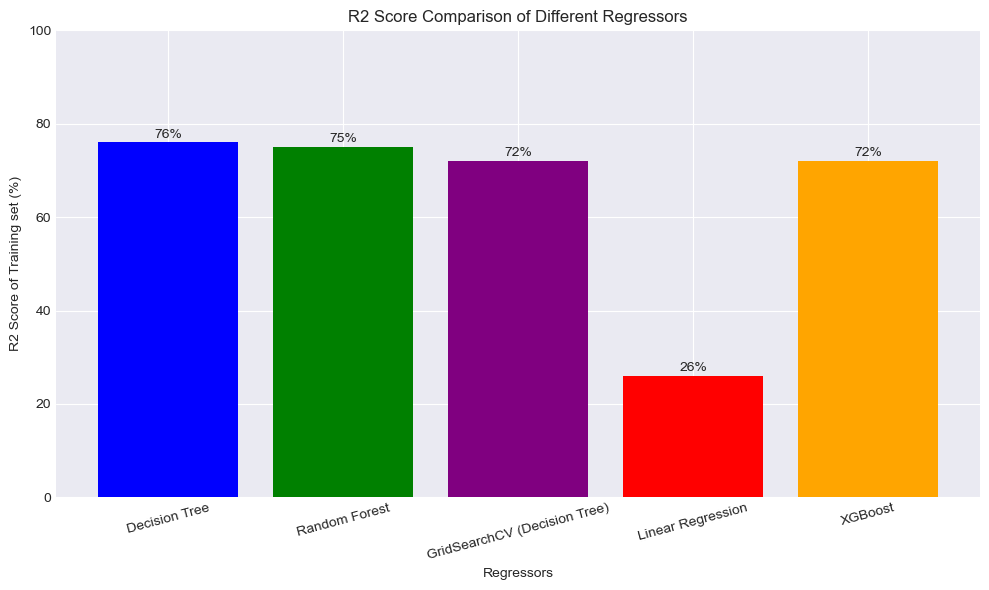

In [90]:
import matplotlib.pyplot as plt
regressors = ['Decision Tree', 'Random Forest', 'GridSearchCV (Decision Tree)', 'Linear Regression', 'XGBoost']
r2_scores = [76, 75, 72, 26, 72]
plt.figure(figsize=(10, 6))
plt.bar(regressors, r2_scores, color=['blue', 'green', 'purple', 'red', 'orange'])
plt.xlabel('Regressors')
plt.ylabel('R2 Score of Training set (%)')
plt.title('R2 Score Comparison of Different Regressors')
plt.ylim(0, 100)
plt.xticks(rotation=15)
for i, score in enumerate(r2_scores):
    plt.text(i, score + 1, f'{score}%', ha='center')
plt.tight_layout()
plt.show()

## **R2 Score Comparison of Different Regressors in the Testing Set**

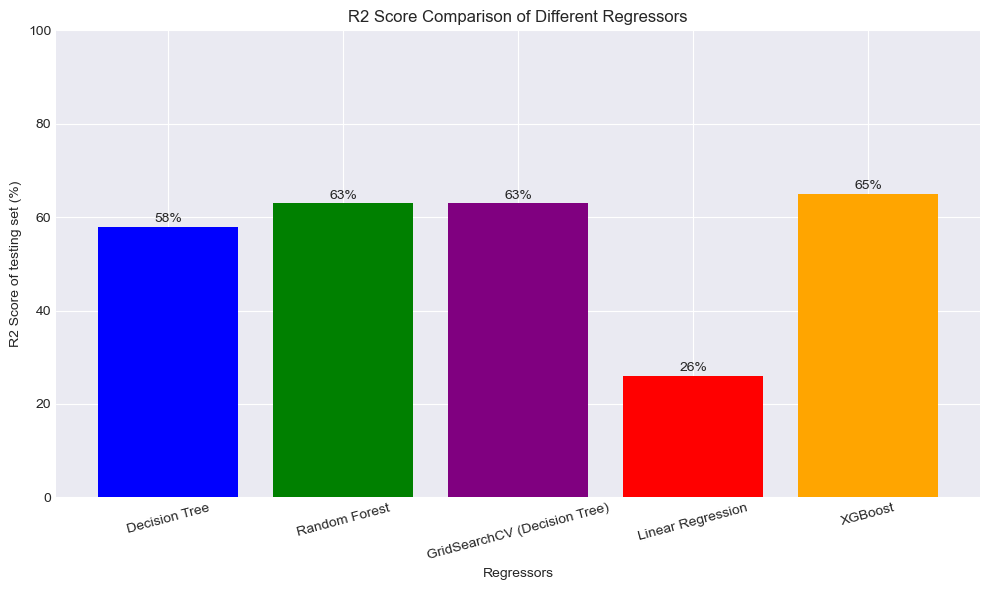

In [91]:
import matplotlib.pyplot as plt
regressors = ['Decision Tree', 'Random Forest', 'GridSearchCV (Decision Tree)', 'Linear Regression', 'XGBoost']
r2_scores = [58, 63, 63, 26, 65]
plt.figure(figsize=(10, 6))
plt.bar(regressors, r2_scores, color=['blue', 'green', 'purple', 'red', 'orange'])
plt.xlabel('Regressors')
plt.ylabel('R2 Score of testing set (%)')
plt.title('R2 Score Comparison of Different Regressors')
plt.ylim(0, 100)
plt.xticks(rotation=15)
for i, score in enumerate(r2_scores):
    plt.text(i, score + 1, f'{score}%', ha='center')
plt.tight_layout()
plt.show()

## **Comparison of Log RMSE and Log MAE Scores for Different Regressiors in the Training Set**

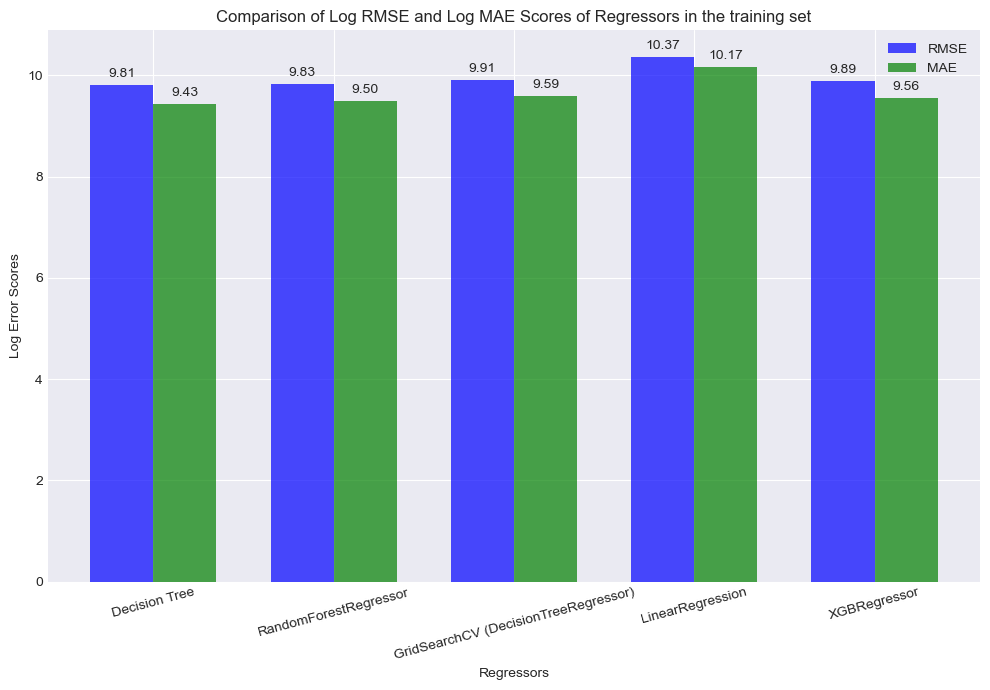

In [94]:
classifiers = ['Decision Tree', 'RandomForestRegressor', 'GridSearchCV (DecisionTreeRegressor)', 'LinearRegression', 'XGBRegressor']
mse_scores = [9.81, 9.83, 9.91, 10.37, 9.89]
mae_scores = [9.43, 9.50, 9.59, 10.17, 9.56]
plt.figure(figsize=(10, 7))
bar_width = 0.35
index = range(len(classifiers))
plt.bar(index, mse_scores, bar_width, label='RMSE', color='b', alpha=0.7)
plt.bar([i + bar_width for i in index], mae_scores, bar_width, label='MAE', color='g', alpha=0.7)
plt.xlabel('Regressors')
plt.ylabel('Log Error Scores')
plt.title('Comparison of Log RMSE and Log MAE Scores of Regressors in the training set')
plt.xticks([i + bar_width / 2 for i in index], classifiers, rotation=15)
plt.legend()
for i, mse, mae in zip(index, mse_scores, mae_scores):
    plt.text(i, mse + 0.1, f'{mse:.2f}', ha='center', va='bottom')
    plt.text(i + bar_width, mae + 0.1, f'{mae:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


## **Comparison of Log RMSE and Log MAE Scores for Different Regressiors in the Testing Set**

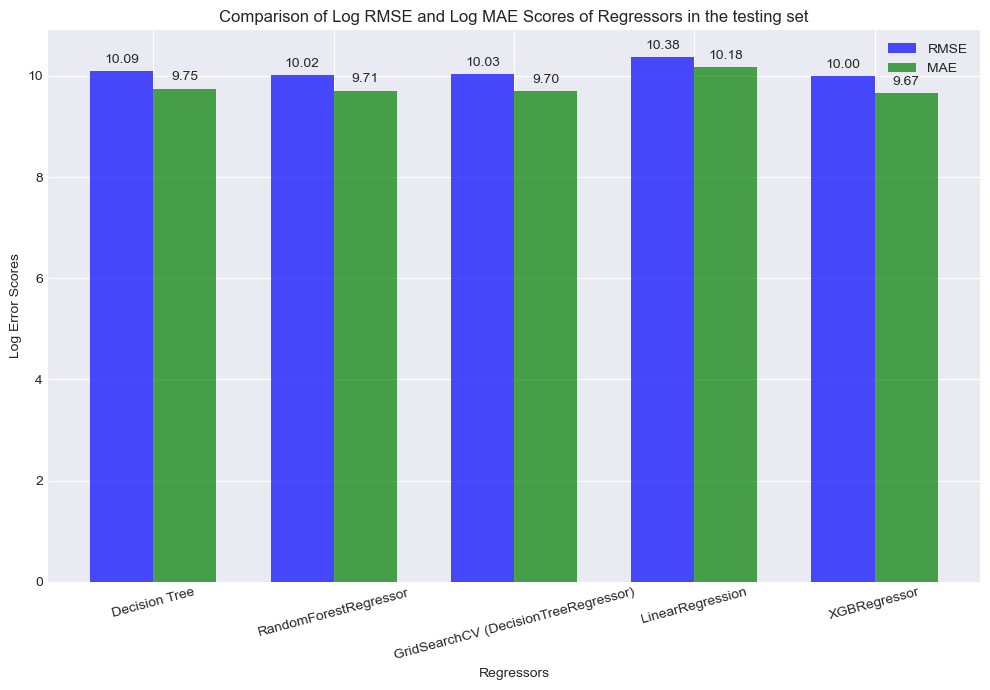

In [95]:
classifiers = ['Decision Tree', 'RandomForestRegressor', 'GridSearchCV (DecisionTreeRegressor)', 'LinearRegression', 'XGBRegressor']
mse_scores = [10.09, 10.02, 10.03, 10.38, 10.00]
mae_scores = [9.75, 9.71, 9.70, 10.18, 9.67]
plt.figure(figsize=(10, 7))
bar_width = 0.35
index = range(len(classifiers))
plt.bar(index, mse_scores, bar_width, label='RMSE', color='b', alpha=0.7)
plt.bar([i + bar_width for i in index], mae_scores, bar_width, label='MAE', color='g', alpha=0.7)
plt.xlabel('Regressors')
plt.ylabel('Log Error Scores')
plt.title('Comparison of Log RMSE and Log MAE Scores of Regressors in the testing set')
plt.xticks([i + bar_width / 2 for i in index], classifiers, rotation=15)
plt.legend()
for i, mse, mae in zip(index, mse_scores, mae_scores):
    plt.text(i, mse + 0.1, f'{mse:.2f}', ha='center', va='bottom')
    plt.text(i + bar_width, mae + 0.1, f'{mae:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


## **Save Model**

In [96]:
import pickle

In [97]:
data = {"model": xgb_reg, "le_country": le_country, "le_education": le_education, "le_employment": le_employment}
with open('salary_model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [98]:
with open('salary_model.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]
le_education = data["le_employment"]

In [99]:
y_pred = regressor_loaded.predict(sample)
y_pred

array([120198.66], dtype=float32)